<a href="https://colab.research.google.com/github/madhurithika22/Restaurant-EDA/blob/main/Restaurant_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Placement/i1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Placement/i2.csv')

In [ ]:
df = df1.merge(df2, how = 'outer')

In [ ]:
df.shape

(15621, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [ ]:
df.isna().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [ ]:
df['Invoice No.'].nunique()  #no of unique values

4925

In [ ]:
df['Invoice No.'].unique()  #what are the unique values

array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [ ]:
df['Final Total'].sum()

np.float64(2397010.12)

In [ ]:
#average order value (total revenue/no.of invoice)
avg = df['Final Total'].sum() / df['Invoice No.'].nunique()

In [ ]:
invoice_total = df.groupby(df['Invoice No.'])['Final Total'].sum()
print(invoice_total)

Invoice No.
23465    1134.00
23466     441.00
23467     774.88
23468     273.00
23469     462.00
          ...   
28385     493.50
28386    1479.44
28387    1501.50
28388    1928.82
28389     666.76
Name: Final Total, Length: 4925, dtype: float64


In [ ]:
df.groupby(df['Invoice No.'])['Final Total'].sum().loc[28327]

np.float64(1081.5)

In [ ]:
item_qty = df.groupby(df['Item Name'])['Qty.'].sum().sort_values(ascending = False).head(3)
print(item_qty)

Item Name
Mineral Water                             1672.0
Chicken Biriyani With Raitha And Gravy    1453.0
Butter Naan                               1046.0
Name: Qty., dtype: float64


<Axes: xlabel='Item Name'>

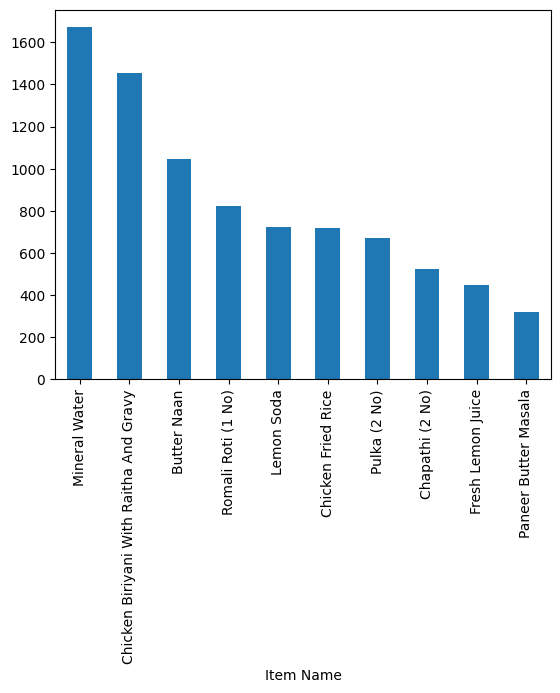

In [ ]:
import matplotlib.pyplot as plt
df.groupby(df['Item Name'])['Qty.'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [ ]:
df[df['Date']=="2023-09-14"].groupby(df['Invoice No.'])['Final Total'].sum().sort_values(ascending = False).head(1)

,Final Total
Invoice No.,
28215,1492.2


In [ ]:
d = df.groupby(df['Invoice No.'])['Final Total'].sum()>avg
d[d==True].count()

np.int64(1458)

**Decision Tree**

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


DecisionTreeClassifier(criterion='entropy')

0.7266187050359713

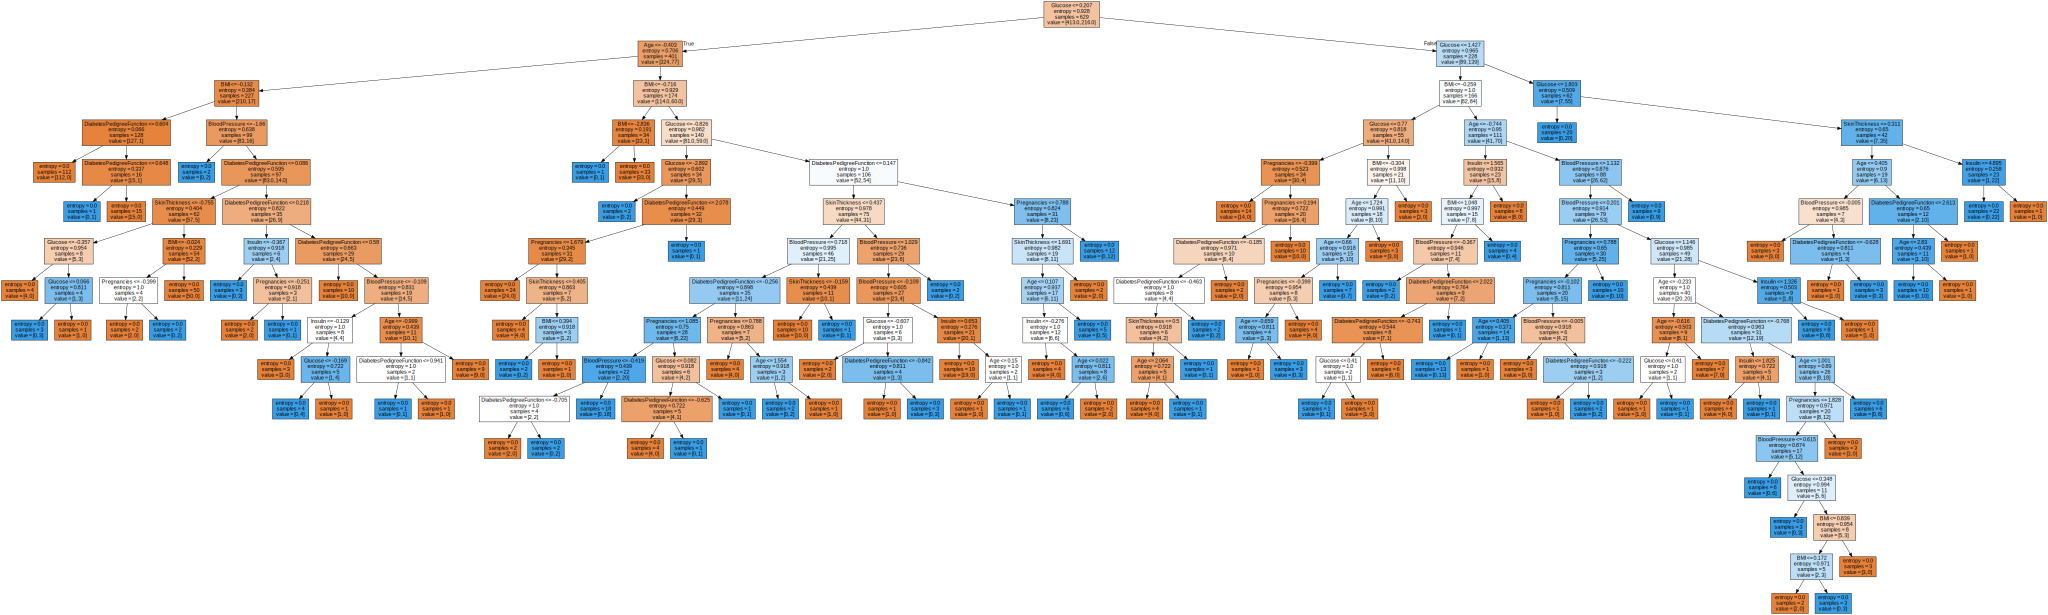